<a href="https://colab.research.google.com/github/NinaAbeyratne/Snaky---Snake-Identification-System/blob/Nina/Transform_and_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


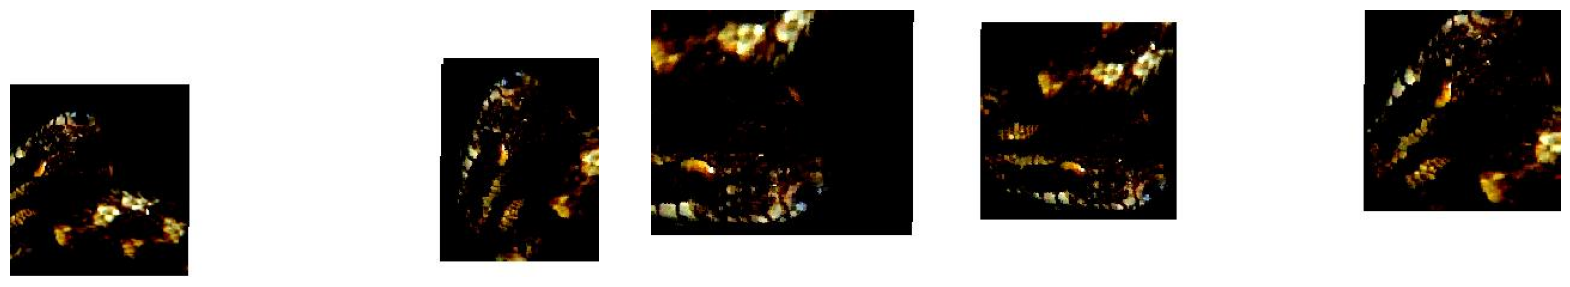

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
from google.colab import drive
from PIL import Image

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/DSGP Group 24/Dataset/dataset - Nina/snake images/"

# Create a directory to save augmented images
augmented_path = "/content/drive/MyDrive/DSGP Group 24/Dataset/augmented_images"
os.makedirs(augmented_path, exist_ok=True)

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define data augmentation transformations
data_augmentation = transforms.RandomApply([
    transforms.RandomRotation(40),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), shear=0.2, scale=(0.8, 1.2),
                             fill=(255, 255, 255)),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), shear=0.2, scale=(0.8, 1.2),
                             fill=(255, 255, 255)),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), shear=0.2, scale=(0.8, 1.2),
                             fill=(255, 255, 255)),
], p=1)

# Function to augment images and save
def augment_and_save(image_path):
    img = Image.open(image_path)

    # Check if the image has an alpha channel (4 channels)
    if img.mode == 'RGBA':
        img = img.convert('RGB')  # Convert RGBA to RGB

    img_tensor = transform(img)  # Apply transformations

    # Save original image
    save_image(img_tensor, os.path.join(augmented_path, f"original_{os.path.basename(image_path)}"))

    # Apply data augmentation and save
    augmented_img_tensors = [data_augmentation(img_tensor) for _ in range(5)]  # Augment 5 times
    for i, augmented_img_tensor in enumerate(augmented_img_tensors):
        save_image(augmented_img_tensor, os.path.join(augmented_path, f"augmented_{i}_{os.path.basename(image_path)}"))

# Iterate through images in the dataset path
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(dataset_path, filename)
        augment_and_save(image_path)

# Plot a sample of augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    img = plt.imread(os.path.join(augmented_path, f"augmented_{i}_{os.path.basename(image_path)}"))
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()
